In [17]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [18]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        annot = True,
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame(
        model.feature_importances_  ,
        columns = [ 'Importance' ] ,
        index = X.columns
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

In [19]:
import os
currentWorkSpace = "/Users/xinrui/tao/apps/gitlab/my-kaggle-journey/titanic"
# get titanic & test csv files as a DataFrame
train = pd.read_csv(currentWorkSpace+"/data/train.csv")
test    = pd.read_csv(currentWorkSpace+"/data/test.csv")

full = train.append( test , ignore_index = True )
titanic = full[ :891 ]

#del train , test

print ('Datasets:' , 'full:' , full.shape , 'titanic:' , titanic.shape)

Datasets: full: (1309, 12) titanic: (891, 12)


In [20]:
print ('Train:' ,  train.shape , 'test' , test.shape)

Train: (891, 12) test (418, 11)


In [21]:
titanic.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Age</th>
      <th>Cabin</th>
      <th>Embarked</th>
      <th>Fare</th>
      <th>Name</th>
      <th>Parch</th>
      <th>PassengerId</th>
      <th>Pclass</th>
      <th>Sex</th>
      <th>SibSp</th>
      <th>Survived</th>
      <th>Ticket</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>22.0</td>
      <td>NaN</td>
      <td>S</td>
      <td>7.2500</td>
      <td>Braund, Mr. Owen Harris</td>
      <td>0</td>
      <td>1</td>
      <td>3</td>
      <td>male</td>
      <td>1</td>
      <td>0.0</td>
      <td>A/5 21171</td>
    </tr>
    <tr>
      <th>1</th>
      <td>38.0</td>
      <td>C85</td>
      <td>C</td>
      <td>71.2833</td>
      <td>Cumings, Mrs. John Bradley (Florence Briggs Th...</td>
      <td>0</td>
      <td>2</td>
      <td>1</td>
      <td>female</td>
      <td>1</td>
      <td>1.0</td>
      <td>PC 17599</td>
    </tr>
    <tr>
      <th>2</th>
      <td>26.0</td>
      <td>NaN</td>
      <td>S</td>
      <td>7.9250</td>
      <td>Heikkinen, Miss. Laina</td>
      <td>0</td>
      <td>3</td>
      <td>3</td>
      <td>female</td>
      <td>0</td>
      <td>1.0</td>
      <td>STON/O2. 3101282</td>
    </tr>
    <tr>
      <th>3</th>
      <td>35.0</td>
      <td>C123</td>
      <td>S</td>
      <td>53.1000</td>
      <td>Futrelle, Mrs. Jacques Heath (Lily May Peel)</td>
      <td>0</td>
      <td>4</td>
      <td>1</td>
      <td>female</td>
      <td>1</td>
      <td>1.0</td>
      <td>113803</td>
    </tr>
    <tr>
      <th>4</th>
      <td>35.0</td>
      <td>NaN</td>
      <td>S</td>
      <td>8.0500</td>
      <td>Allen, Mr. William Henry</td>
      <td>0</td>
      <td>5</td>
      <td>3</td>
      <td>male</td>
      <td>0</td>
      <td>0.0</td>
      <td>373450</td>
    </tr>
  </tbody>
</table>
</div>

In [22]:
titanic.describe()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Age</th>
      <th>Fare</th>
      <th>Parch</th>
      <th>PassengerId</th>
      <th>Pclass</th>
      <th>SibSp</th>
      <th>Survived</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>714.000000</td>
      <td>891.000000</td>
      <td>891.000000</td>
      <td>891.000000</td>
      <td>891.000000</td>
      <td>891.000000</td>
      <td>891.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>29.699118</td>
      <td>32.204208</td>
      <td>0.381594</td>
      <td>446.000000</td>
      <td>2.308642</td>
      <td>0.523008</td>
      <td>0.383838</td>
    </tr>
    <tr>
      <th>std</th>
      <td>14.526497</td>
      <td>49.693429</td>
      <td>0.806057</td>
      <td>257.353842</td>
      <td>0.836071</td>
      <td>1.102743</td>
      <td>0.486592</td>
    </tr>
    <tr>
      <th>min</th>
      <td>0.420000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>20.125000</td>
      <td>7.910400</td>
      <td>0.000000</td>
      <td>223.500000</td>
      <td>2.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>28.000000</td>
      <td>14.454200</td>
      <td>0.000000</td>
      <td>446.000000</td>
      <td>3.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>38.000000</td>
      <td>31.000000</td>
      <td>0.000000</td>
      <td>668.500000</td>
      <td>3.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>80.000000</td>
      <td>512.329200</td>
      <td>6.000000</td>
      <td>891.000000</td>
      <td>3.000000</td>
      <td>8.000000</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>
</div>

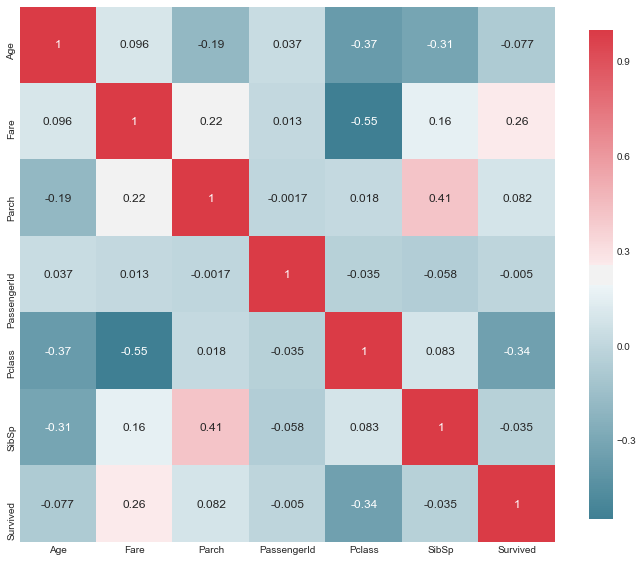

In [23]:
plot_correlation_map( titanic )

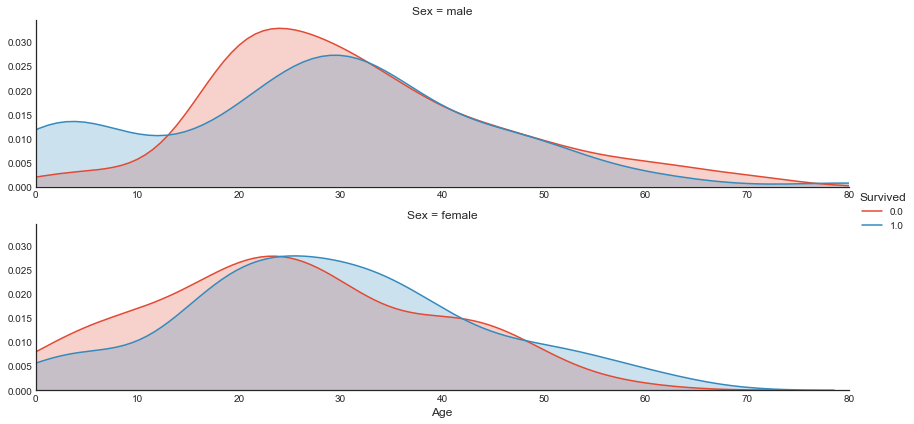

In [24]:
# Plot distributions of Age of passangers who survived or did not survive
plot_distribution( titanic , var = 'Age' , target = 'Survived' , row = 'Sex' )

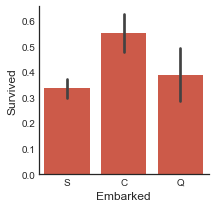

In [25]:
# Plot survival rate by Embarked
plot_categories( titanic , cat = 'Embarked' , target = 'Survived' )

In [25]:
# Transform Sex into binary values 0 and 1
sex = pd.Series( np.where( full.Sex == 'male' , 1 , 0 ) , name = 'Sex' )

In [26]:
sex

0       1
1       0
2       0
3       0
4       1
5       1
6       1
7       1
8       0
9       0
10      0
11      0
12      1
13      1
14      0
15      0
16      1
17      1
18      0
19      0
20      1
21      1
22      0
23      1
24      0
25      0
26      1
27      1
28      0
29      1
       ..
1279    1
1280    1
1281    1
1282    0
1283    1
1284    1
1285    1
1286    0
1287    1
1288    0
1289    1
1290    1
1291    0
1292    1
1293    0
1294    1
1295    1
1296    1
1297    1
1298    1
1299    0
1300    0
1301    0
1302    0
1303    0
1304    1
1305    0
1306    1
1307    1
1308    1
Name: Sex, Length: 1309, dtype: int64

In [27]:
# Create a new variable for every unique value of Embarked
embarked = pd.get_dummies( full.Embarked , prefix='Embarked' )
embarked.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Embarked_C</th>
      <th>Embarked_Q</th>
      <th>Embarked_S</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
  </tbody>
</table>
</div>

In [28]:
# Create a new variable for every unique value of Embarked
pclass = pd.get_dummies( full.Pclass , prefix='Pclass' )
pclass.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Pclass_1</th>
      <th>Pclass_2</th>
      <th>Pclass_3</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
  </tbody>
</table>
</div>

In [29]:
# Create dataset
imputed = pd.DataFrame()

# Fill missing values of Age with the average of Age (mean)
imputed[ 'Age' ] = full.Age.fillna( full.Age.mean() )

# Fill missing values of Fare with the average of Fare (mean)
imputed[ 'Fare' ] = full.Fare.fillna( full.Fare.mean() )

imputed.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Age</th>
      <th>Fare</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>22.0</td>
      <td>7.2500</td>
    </tr>
    <tr>
      <th>1</th>
      <td>38.0</td>
      <td>71.2833</td>
    </tr>
    <tr>
      <th>2</th>
      <td>26.0</td>
      <td>7.9250</td>
    </tr>
    <tr>
      <th>3</th>
      <td>35.0</td>
      <td>53.1000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>35.0</td>
      <td>8.0500</td>
    </tr>
  </tbody>
</table>
</div>

In [30]:
plot_variable_importance(train_X, train_y)

NameError: name 'train_X' is not defined